In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Project_github/K-mean/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
check = pd.DataFrame({
    'Null':df.isnull().sum(),
    'Unique':df.nunique()
})



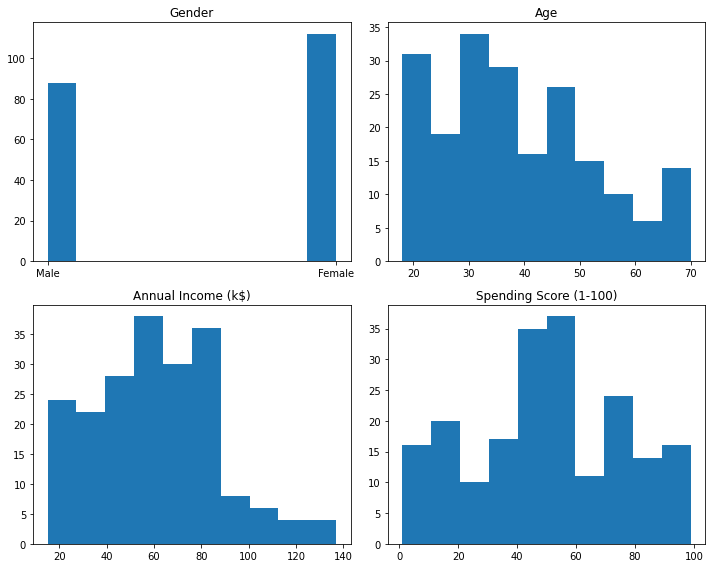

In [ ]:
columns = ['Gender','Age','Annual Income (k$)','Spending Score (1-100)']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axs = axs.flatten()
for i, col in enumerate(columns):
    axs[i].hist(df[col])
    axs[i].set_title(col)
plt.tight_layout()
plt.show()

In [ ]:
X = df.iloc[:, [2, 3]].values

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

k = 1: SSE = 176108.78000000003
k = 2: SSE = 87121.56591478697
k = 3: SSE = 59486.961439280356
k = 4: SSE = 39529.88796736351
k = 5: SSE = 31674.906249279375
k = 6: SSE = 25643.265320259467
k = 7: SSE = 21839.635516285518
k = 8: SSE = 18808.749269005843
k = 9: SSE = 16044.791695328167
k = 10: SSE = 13912.451770855001


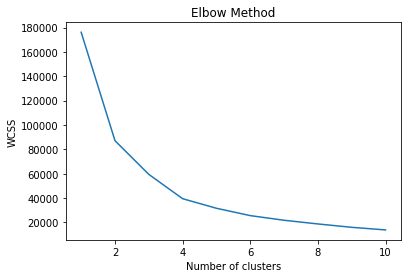

In [ ]:
#หา K ที่ดีที่สุด
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
for i in range(len(wcss)):
    print(f"k = {i+1}: SSE = {wcss[i]}")
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#fit model k=5 
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


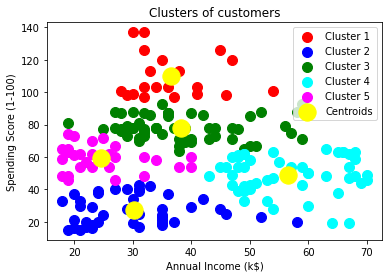

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
df_clusters = pd.concat([df, pd.Series(y_kmeans, name='cluster')], axis=1)
df_clusters

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,0
198,199,Male,32,137,18,0


In [ ]:
avg_income_spending = df_clusters.groupby('cluster')['Annual Income (k$)', 'Spending Score (1-100)'].mean()
avg_income_spending

<ipython-input-43-0684c4a24b1b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_income_spending = df_clusters.groupby('cluster')['Annual Income (k$)', 'Spending Score (1-100)'].mean()


,Annual Income (k$),Spending Score (1-100)
cluster,,
0,109.700000,52.000000
1,27.071429,56.690476
2,77.915254,52.406780
3,49.061224,43.489796
4,59.333333,46.533333
